In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data and combining the data into one frame

In [2]:
data1 = pd.read_csv('2009-10.csv', encoding='latin1')
data2 = pd.read_csv('20010-11.csv', encoding='latin1')

In [3]:
data = pd.concat([data1, data2])
data.reset_index(drop=True, inplace=True)

In [4]:
data.shape

(1067371, 8)

In [5]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


Making note of the top 10 selling items

In [7]:
top_10_stocks = data['StockCode'].value_counts().head(10).index

In [9]:
top_10_stocks

Index(['85123A', '22423', '85099B', '21212', '20725', '84879', '47566',
       '21232', '22197', '22383'],
      dtype='object', name='StockCode')

Calculating the Abi Index

In [10]:
abi_index = {}

In [11]:
for i in combinations(top_10_stocks, 2):
    pairs = len(data[(data['StockCode'] == i[0]) & (data['StockCode'].shift(-1) == i[1])])
    abi_index[i] = pairs / len(data[data['StockCode'] == i[0]])

{('85123A', '22423'): 0.005832904443300738,
 ('85123A', '85099B'): 0.004460456338994682,
 ('85123A', '21212'): 0.001544004117344313,
 ('85123A', '20725'): 0.0027448962086121117,
 ('85123A', '84879'): 0.007720020586721565,
 ('85123A', '47566'): 0.0053182364041859664,
 ('85123A', '21232'): 0.0027448962086121117,
 ('85123A', '22197'): 0.003602676273803397,
 ('85123A', '22383'): 0.0008577800651912849,
 ('22423', '85099B'): 0.0031645569620253164,
 ('22423', '21212'): 0.005198915009041591,
 ('22423', '20725'): 0.0018083182640144665,
 ('22423', '84879'): 0.007459312839059674,
 ('22423', '47566'): 0.004746835443037975,
 ('22423', '21232'): 0.0033905967450271247,
 ('22423', '22197'): 0.004746835443037975,
 ('22423', '22383'): 0.00135623869801085,
 ('85099B', '21212'): 0.0023719165085388993,
 ('85099B', '20725'): 0.013045540796963948,
 ('85099B', '84879'): 0.0018975332068311196,
 ('85099B', '47566'): 0.0026091081593927895,
 ('85099B', '21232'): 0.0016603415559772296,
 ('85099B', '22197'): 0.0030

Calculating the next best product according to the abi index

In [19]:
next_product = {}

for item in top_10_stocks:
    related_items = [(k[1], v) for k, v in abi_index.items() if k[0] == item]
    if related_items:
        next_product[item] = max(related_items, key=lambda x: x[1])[0]
    else:
        next_product[item] = None


In [20]:
next_product

{'85123A': '84879',
 '22423': '84879',
 '85099B': '20725',
 '21212': '21232',
 '20725': '22383',
 '84879': '47566',
 '47566': '22197',
 '21232': '22197',
 '22197': '22383',
 '22383': None}

Creating the dataframe of the corresponding values

In [21]:
abi_mat = pd.DataFrame(index=top_10_stocks, columns=top_10_stocks)
for i, j in abi_index.items():
    abi_mat.loc[i[0], i[1]] = j

    

In [22]:
abi_mat

StockCode,85123A,22423,85099B,21212,20725,84879,47566,21232,22197,22383
StockCode,,,,,,,,,,
85123A,NaN,0.005833,0.00446,0.001544,0.002745,0.00772,0.005318,0.002745,0.003603,0.000858
22423,NaN,NaN,0.003165,0.005199,0.001808,0.007459,0.004747,0.003391,0.004747,0.001356
85099B,NaN,NaN,NaN,0.002372,0.013046,0.001898,0.002609,0.00166,0.003083,0.004269
21212,NaN,NaN,NaN,NaN,0.003918,0.001507,0.003014,0.012055,0.001507,0.000603
20725,NaN,NaN,NaN,NaN,NaN,0.000614,0.000921,0.005523,0.001227,0.044799
84879,NaN,NaN,NaN,NaN,NaN,NaN,0.008108,0.001689,0.002365,0.000676
47566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002168,0.003613,0.001806
21232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002912,0.00182
22197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001177


Plotting a heatmat for better visualisation of the calculation of the respestive abi indices

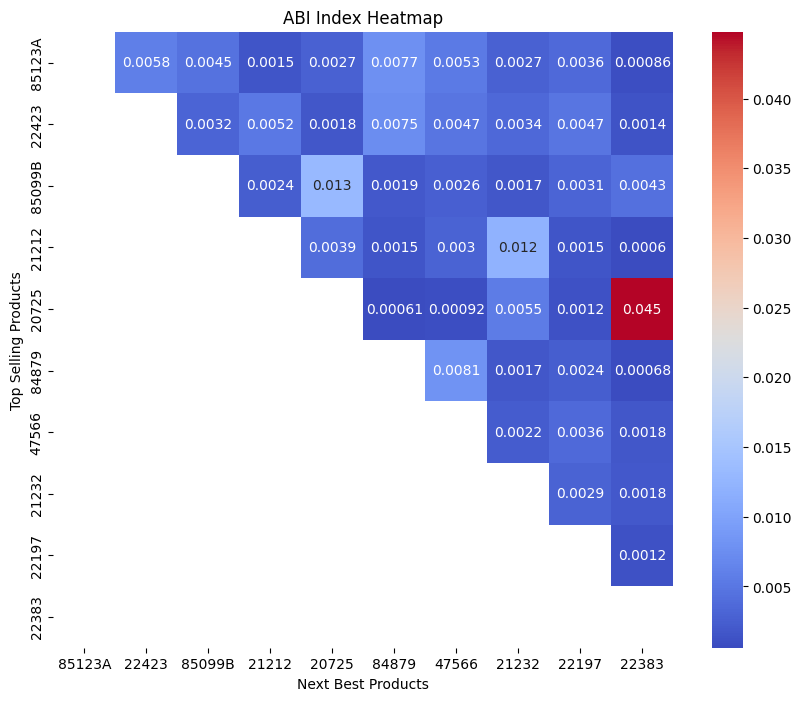

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(abi_mat.astype(float), annot=True, cmap='coolwarm')
plt.title('ABI Index Heatmap')
plt.xlabel('Next Best Products')
plt.ylabel('Top Selling Products')
plt.show()
